# Artificial Nerual Networks

## Implementing MLPs with sklearn

### Regression MLPs

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

In [7]:
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [9]:
y_val_pred = pipeline.predict(X_val)

In [10]:
rmse_val = root_mean_squared_error(y_val, y_val_pred)

In [11]:
rmse_val

0.5053326657968437

* The MLPRegressor class uses the mean squared error, which is usually what you want
for regression, but if you have a lot of outliers in the training set, you may prefer to
use the mean absolute error instead. Alternatively, you may want to use the Huber
loss, which is a combination of both. It is quadratic when the error is smaller than
a threshold δ (typically 1) but linear when the error is larger than δ. The linear part
makes it less sensitive to outliers than the mean squared error, and the quadratic
part allows it to converge faster and be more precise than the mean absolute error.
However, MLPRegressor only supports the MSE

* Typical regrssion MLP architecture:

| Hyperparameter | Typical value  |
|----------------|----------------|
| # hidden layer | Depends on the problem, but typically 1 to 5 |
| # neurons per hidden layer | Depends on the problem, but typically 10 to 100 |
| # output neurons | 1 per prediction dimension |
| Hidden activation | ReLU |
| Output activation | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh(if bounded output)
| Loss function | MSE, or Huber if outliers

### Classification MLPs

* Typical classification MLP architecture

| Hyperparameter | Binary classification | Multilabel binary classification | Multiclass classification|
|----------------|-----------------------|----------------------------------|--------------------------|
| # hidden layer | Typically 1 to 5 layers, depending on the task|
| # output neurons| 1 | 1 per binary label | 1 per class |
| Output layer activation | Sigmoid | Sigmoid | Softmax |
| Loss function | X-entropy | X-entropy | X-entropy |




## Implementing MLPs with Keras

### Building a image classifier using the sequential API

In [13]:
import tensorflow as tf

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [17]:
(X_train, y_train), (x_test, y_test) = fashion_mnist

num_instances_val = 5000
X_train, y_train = X_train[:-num_instances_val], y_train[:-num_instances_val]
X_val, y_val = X_train[-num_instances_val:], y_train[-num_instances_val:]

In [18]:
X_train.shape, X_val.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (5160, 8))

In [22]:
X_train, X_val, X_test = X_train/ 255., X_val/255., X_test/255.

In [78]:
import matplotlib.pyplot as plt

def plot_image(image_data, cmap='binary', title=None, figsize=None):
    plt.imshow(image_data,cmap=cmap)
    plt.axis('off')
    plt.title(title)

    if figsize:
        plt.figure(figsize=figsize)

In [83]:
import numpy as np

class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [84]:
class_names[y_train[0]]

np.str_('Ankle boot')

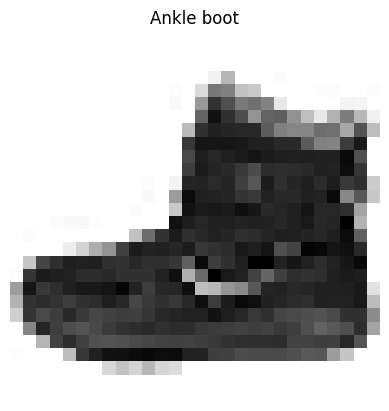

In [85]:
plot_image(X_train[0], title=class_names[y_train[0]])

In [86]:
def plot_grid_images(images, num_rows, num_cols, titles=None, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    for row in range(num_rows):
        for col in range(num_cols):
            index = col + (num_cols * row)
            plt.subplot(num_rows, num_cols, index + 1)
            plot_image(images[index], title=titles[index])
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

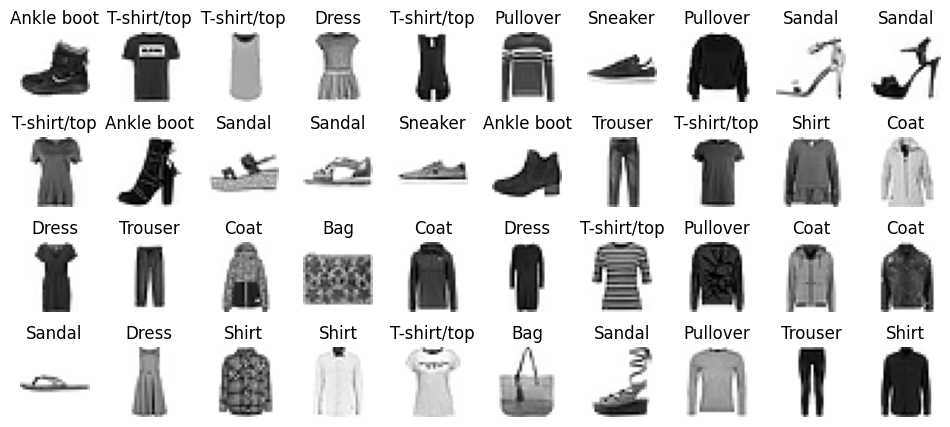

In [87]:
plot_grid_images(X_train, num_rows=4, num_cols=10, titles=class_names[y_train], figsize=(12,5))

In [88]:
tf.random.set_seed(42)

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [96]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                 │ (None, 784)                │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                     │ (None, 300)                │         235,500 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                     │ (None, 100)                │          30,100 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                     │ (None, 10)                 │           1,010 │
└─────────────────────────────────────┴────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

All global state managed by Keras is stored in a Keras session,
which you can clear using 
```python
tf.keras.backend.clear_session()
```
In particular, this resets the name counters.